### Se pide:
# La variable en esta regresion va a ser la columna precio.

A partir del archivo "USA_Housing.csv", realizar la regresión lineal entre cada columna numérica con la columna 'price'. 

Cuando existe una columna(variable) que es la que se quiere comparar, se le llama 'target'. 

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../data/USA_Housing.csv")
df

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\r\nLaurabury, NE 37..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\r\nLake Kathleen, ..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\r\nDanieltown, WI 064..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\r\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\r\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\r\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\r\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\r\nJoshualand, VA ..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\r\nFPO AE 73316


In [74]:
df=df.iloc[:,0:6]
df

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05
...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06


In [75]:
X=df.iloc[:,5]
X=np.array(X)
X

array([1059033.55787012, 1505890.91484695, 1058987.98787608, ...,
       1030729.58315229, 1198656.87240769, 1298950.48026696])

In [76]:
y=df.iloc[:,0]
y=np.array(X)
y

array([1059033.55787012, 1505890.91484695, 1058987.98787608, ...,
       1030729.58315229, 1198656.87240769, 1298950.48026696])

In [77]:
X = X.reshape(-1, 1)
X.shape

(5000, 1)

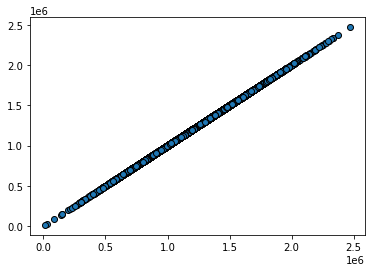

In [78]:

plt.scatter(X,y, edgecolor='black')

In [79]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
#El 20% de los datos como test o prueba
train_errors, val_errors = [], []

def plot_learning_curves(model, X, Y):
    X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.20)
    
    for m in range(1, len(X_train)):  # Incremental
        
        x = X_train[:m]
        y = y_train[:m]
        model.fit(x, y)

        y_train_predict = model.predict(x)
        y_val_predict = model.predict(X_val)

        train_errors.append(mean_squared_error(y, y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
        
        if m < 1000:
            print("##### ITERACIÓN " + str(m) + " #####")
            print("x", x)
            print("y", y)
            print("y_train_predict", y_train_predict)
            print("-----\nX_val\n", X_val)
            print("y_val_predict", y_val_predict)

    plt.plot(train_errors, "r-+", linewidth=2, label="train")
    plt.plot(val_errors, "b-", linewidth=3, label="val")

]
 [ 635419.3652163 ]
 [1369753.28174858]
 [ 774073.56185409]
 [1055484.37348079]
 [1027311.5076734 ]
 [1735826.00520535]
 [ 905354.91396028]
 [ 999970.67942849]
 [1417047.62711066]
 [1426832.04892582]
 [1130844.02936265]
 [1301881.41652858]
 [1742922.63977119]
 [1245947.10235498]
 [ 742449.31063762]
 [1414294.89797537]
 [1183014.50867395]
 [1770681.1324529 ]
 [1138036.59504191]
 [1056984.18175283]
 [1187454.67248781]
 [1677005.14043603]
 [1182670.13503457]
 [1184462.31994416]
 [1309397.04942904]
 [1526013.32959753]
 [1309985.88679408]
 [1540869.87199948]
 [1124125.92064897]
 [1425632.5419742 ]
 [1105737.46154385]
 [ 986113.23949731]
 [ 874969.69686638]
 [ 829868.23044698]
 [1418977.82858253]
 [1601904.35654034]
 [1303091.90986294]
 [1141916.52543889]
 [1556987.72445977]
 [ 890887.68073159]
 [1625508.01310624]
 [ 796910.71118193]
 [1004471.66087765]
 [1375057.08346865]
 [1204372.29521966]
 [1572513.83815229]
 [1561234.13316886]
 [1144477.87895631]
 [1659100.12428637]
 [1202987.82934714

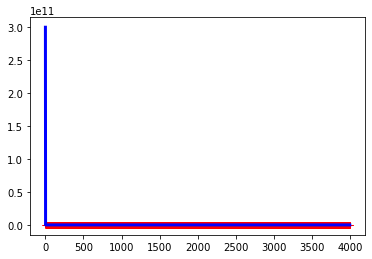

In [80]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
plot_learning_curves(model=lin_reg, X=X, Y=y)

In [81]:
#Calculamos la pendiente
b = lin_reg.coef_ 
b

array([1.])

In [82]:
#Calculamos la secante
a = lin_reg.intercept_
a

1.862645149230957e-09

In [83]:
print("|||||||||||ERRORES||||||||||||")
print("train_errors\n\n", train_errors)
print("val_errors\n\n", val_errors)

.042179744281671e-19, 7.575700817540198e-19, 2.0311994600154748e-18, 3.1399819727649273e-19, 4.1799086743062653e-19, 3.5281675110220186e-20, 4.0618101791930483e-20, 6.2406985421198e-19, 1.149429003380006e-20, 1.5885727054884058e-19, 1.149429003380006e-20, 3.5281675110220186e-20, 1.149429003380006e-20, 9.040359484987995e-19, 3.5281675110220186e-20, 4.0618101791930483e-20, 3.5281675110220186e-20, 1.149429003380006e-20, 7.575700817540198e-19, 1.0609511180833739e-19, 7.575700817540198e-19, 3.1399819727649273e-19, 1.149429003380006e-20, 4.1799086743062653e-19, 2.7014188852720907e-19, 9.719830124685185e-19, 5.733973125174633e-19, 1.149429003380006e-20, 4.1799086743062653e-19, 1.0609511180833739e-19, 3.5141792912937057e-19, 5.042179744281671e-19, 3.5281675110220186e-20, 2.747644437819073e-18, 6.2406985421198e-19, 1.149429003380006e-20, 9.040359484987995e-19, 9.040359484987995e-19, 2.3419350584327113e-19, 1.404320606322383e-18, 1.0609511180833739e-19, 6.988323570335437e-20, 5.733973125174633e-

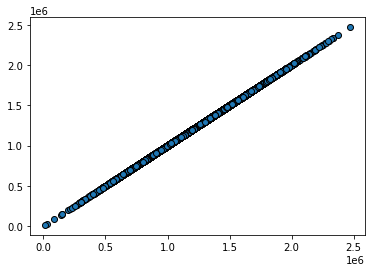

In [84]:
#Para inferir
plt.scatter(X,y, edgecolor='black')

In [85]:
# Esta es una función para que predict pueda tomar una cantidad de valores de X mayor a la cantidad total del array de X que usamos para que prediga. 
def predict(model, number):
    to_predict = np.array([number]).reshape(1, -1)
    return model.predict(to_predict)

In [86]:
predict(lin_reg, number=1020) 
#Si el array de x es de 1000 numeros le pongo 1020 para que sea una predicción a futuro

array([1020.])

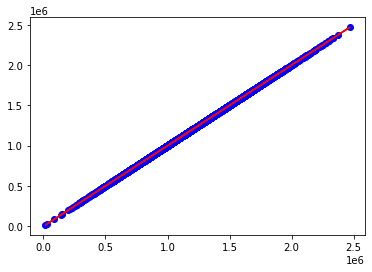

In [87]:
#Dibuja la línea
plt.scatter(X, y, color='b')
plt.plot(X, lin_reg.predict(X), color='red')

plt.show()

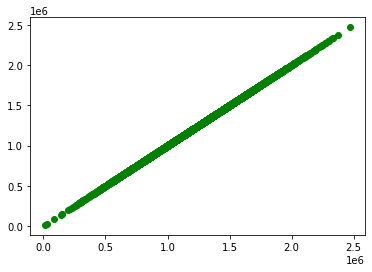

In [88]:
#Entreno al modelo
new_model = LinearRegression()
new_model.fit(X, y)

plt.scatter(X, y, color='g')

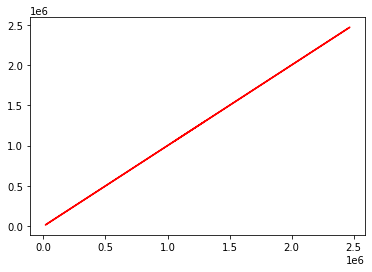

In [89]:
#realizo una predicción del nuevo modelo
plt.plot(X, new_model.predict(X), color='red')

In [94]:
#precisión del nuevo modelo
print(new_model.score(X,y))

1.0


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


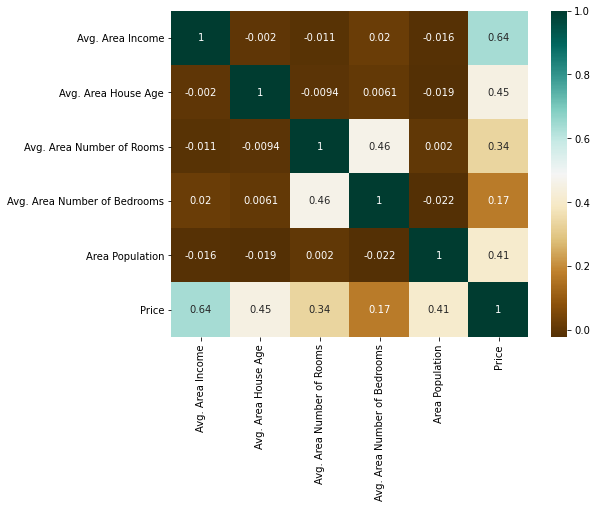

In [91]:
plt.figure(figsize=(8,6))
c=df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c